# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
pip install unicodecsv

  Using cached unicodecsv-0.14.1-py3-none-any.whl

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (792 kB)

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib wordcloud seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re
import unicodecsv
import collections
from collections import Counter

In [6]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
  
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [7]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
 
    parts = data_line 
    label = parts[1]  
    statement = parts[2]   
    return (label, statement)

In [10]:
def pre_process(text):
    # print("original:", text) # uncomment for debugging
    # sentence segmentation - assume already done
    # word tokenisation
    text = re.sub(r"(\w)([.,;:'\"”\)])", r"\1 \2", text) # separates punctuation at ends of strings
    text = re.sub(r"([.,;:'\"“\(\)])(\w)", r"\1 \2", text) # separates punctuation at beginning of strings
    # print("tokenising:", text) # uncomment for debugging
    tokens = re.split(r"\s+",text)
    
    # normalisation - only by lower casing for now
    tokens = [t.lower() for t in tokens]
    #and add !and ? and # in rgex part in question 5
    return tokens

In [11]:
test_sentence=pre_process("Masters? is, Amina.Zoi, I am 15^11 OBSERVANT @ & Contentcreator ! YES.")
print(test_sentence)

['masters?', 'is', ',', 'amina', '.', 'zoi', ',', 'i', 'am', '15^11', 'observant', '@', '&', 'contentcreator', '!', 'yes', '.']


# Question 2: Basic Feature Extraction (20 marks)

In [12]:
global_feature_dict = {}  # A global dictionary of features
global_feature_dict["<unk/>"] = 1  # Assign the first index to unknown tokens
i = 2  # Start indexing from 2

def to_feature_vector(tokens):
    feature_vect = {}  # Initialize a local feature vector
    
    while tokens:
        w = tokens.pop(0)
        try:
            ind = global_feature_dict[w]
        except KeyError:
            ind = len(global_feature_dict) + 1
            global_feature_dict[w] = ind
        
        # Update the local feature vector with the word's count
        feature_vect[ind] = feature_vect.get(ind, 0) + 1
    
    return feature_vect


In [13]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [14]:
#solution
from sklearn.metrics import classification_report
import random
training_set = []
validate_set = []

def cross_validation(dataset, folds):
     # Shuffle the dataset to ensure randomness in fold assignment
    random.shuffle(dataset)
    
    # Calculate fold size
    fold_size = len(dataset) // folds
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        
    return None

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import random
all_predictions = []
all_labels = []
def cross_validate(dataset, folds=10):
    random.shuffle(dataset)
    
    # Compute the size of each fold
    fold_size = int(len(dataset) / folds) + 1

    for i in range(folds):
        # Define start and end indices for the current validation fold
        start = i * fold_size
        end = start + fold_size 
        
        # Split into validation and training sets
        validation_set = dataset[start:end]
        training_set = dataset[:start] + dataset[end:]
        
        # Train the classifier on the training set
        classifier = train_classifier(training_set)

        samples = [features for features, label in validation_set]  # Feature vectors for validation
        labels = [label for features, label in validation_set]       # True labels for validation

        predictions = predict_labels(samples, classifier)
        #print(predictions)
        # Combine predictions and true labels from all folds
        all_predictions.extend(predictions)
        all_labels.extend(labels)
    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')
    accuracy = accuracy_score(all_labels, all_predictions)

    cv_results = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "accuracy": accuracy
    }
    return cv_results


In [16]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [17]:
# initialize global lists that will be appended to by the methods below
raw_data = []      
train_data = []      
test_data = []         

data_file_path = 'sentiment-dataset.tsv'

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
70560


In [18]:
print(train_data[25])
print(global_feature_dict.get('is'))

({352: 1, 353: 1, 59: 1, 354: 2, 14: 2, 355: 2, 356: 2, 357: 2, 20: 5, 156: 1, 358: 1, 359: 1, 159: 1, 360: 1, 140: 1, 361: 1, 147: 1, 362: 1, 363: 3, 18: 1, 229: 1, 6: 1, 44: 1, 364: 1}, 'negative')
82


In [19]:
#cross_validation(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented
cross_validate(train_data, folds=10)

Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...


{'precision': np.float64(0.8348687455604413),
 'recall': np.float64(0.8257447927447014),
 'f1_score': np.float64(0.8299131718747492),
 'accuracy': 0.8480918306499702}

# Question 4: Error Analysis (20 marks)

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

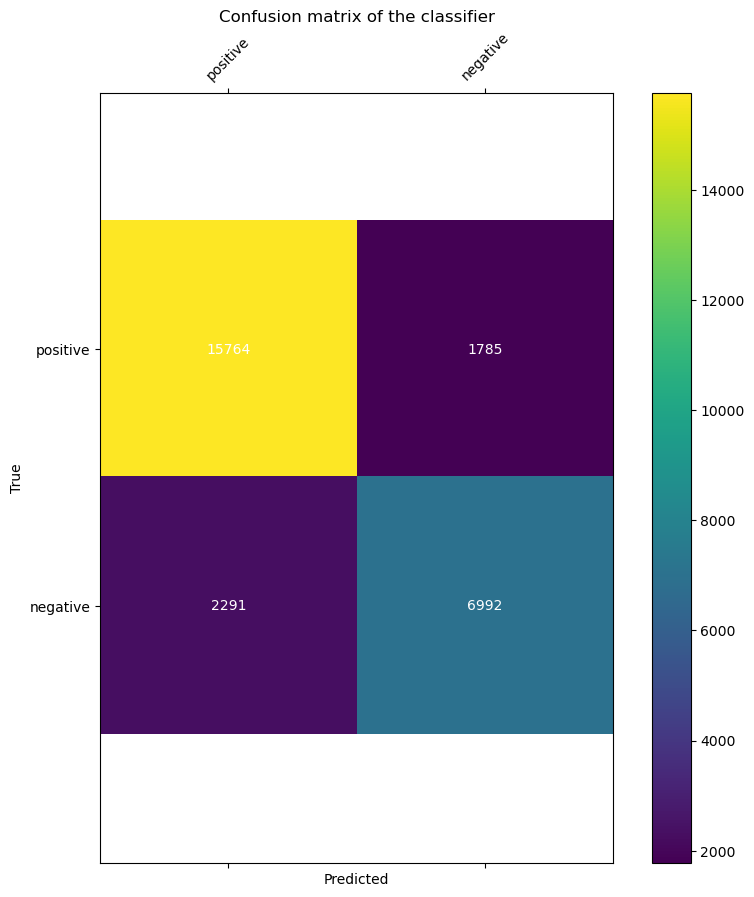

In [21]:
confusion_matrix_heatmap(all_labels[:], all_predictions[:], labels=['positive', 'negative'])

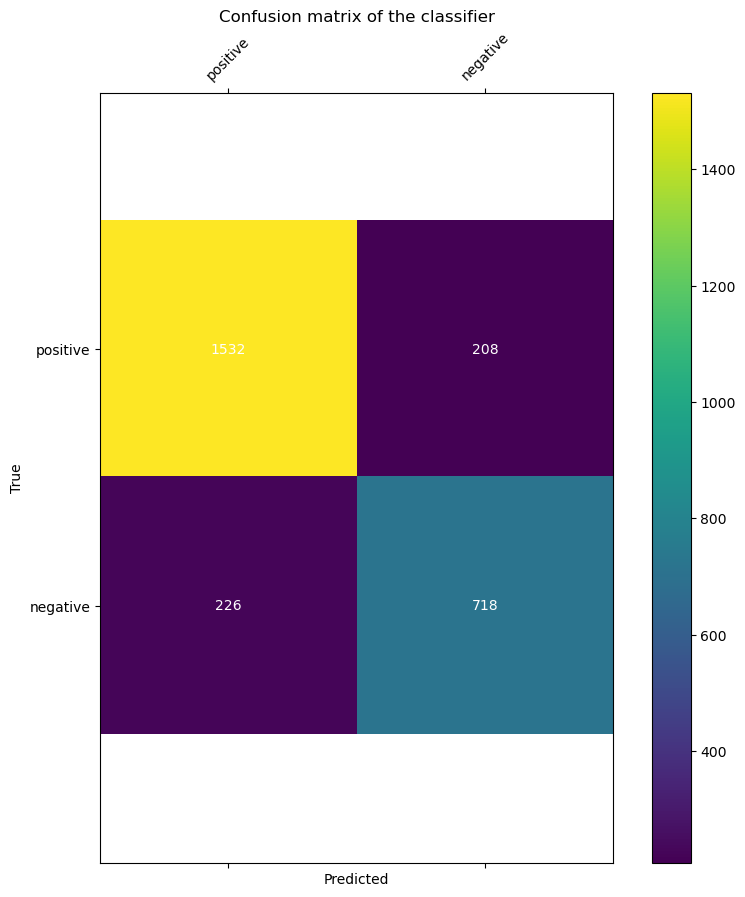

In [22]:
subdata = int(len(train_data) / 10) + 1

# Plot the confusion matrix
confusion_matrix_heatmap(all_labels[:subdata], all_predictions[:subdata], ['positive', 'negative'])

# Write FN and FP sentences to files directly
with open("single_fold_fp.txt", "w") as fp_file, open("single_fold_fn.txt", "w") as fn_file:
    for i in range(subdata):
        # Check for false negatives
        if all_labels[i] == 'positive' and all_predictions[i] == 'negative':
            fn_file.write(f"{train_data[i]}\n")
        # Check for false positives
        elif all_labels[i] == 'negative' and all_predictions[i] == 'positive':
            fp_file.write(f"{train_data[i]}\n")


In [23]:
translate_vec_dict = {key: val for val, key in global_feature_dict.items()}
print(translate_vec_dict[2])

literally


In [24]:
# Define the path to your file
file_path = "single_fold_fp.txt"

# Initialize a list to store the converted entries
false_positives = []

# Open the file and process each line
with open(file_path, "r") as file:
    for line in file:
        # Evaluate the line to extract the dictionary and sentiment tuple
        word_counts, sentiment = eval(line.strip())
        
        # Translate word IDs to their string representations using translate_vec_dict
        words_with_counts = [
            f"{translate_vec_dict.get(word_id, '<unknown>')}:{count}"
            for word_id, count in word_counts.items()
        ]
        
        # Format as "word:count,word:count,.." and add to the list
        formatted_entry = f"{','.join(words_with_counts)}"
        false_positives.append(formatted_entry)

# Print the final list to verify
print(false_positives[1])
print(false_positives[2])
print(false_positives[3])
print(false_positives[4])

thur:1,':4,s:3,day?:1,doesn:1,t:1,sound:1,like:1,the:1,god:1,it:1,was:1,named:1,for:1,.:2,let:1,try:1,,:1,thor:1,day:1
whyd:1,the:2,dumb:1,bish:1,get:1,em:1,in:1,1st:1,place?:1,@funkmasterflex:1,::1,eva:1,longoria:1,removing:1,3:1,tattoos:1,related:1,to:1,tony:1,parker:1,-:1,http:1,://t:1,.:1,co/wmvukwys:1
we:1,might:1,as:1,well:1,bring:1,back:1,orr:1,and:1,mclaren:1,if:1,carlyle:1,continues:1,to:1,play:1,three:1,lines:1,.:2,in:1,my:1,opinion:1,he:1,':1,s:1,not:1,using:1,kozun:1,properly:1,4th:1,line?:1
islam:1,is:1,on:2,the:2,march:1,whole:1,world:1,and:1,good:1,people:1,are:1,keeping:1,quite:1,..:1,#radiobiafra:1,https:1,://t:1,.:1,co/wayw0oedpu:1


In [25]:
# same for false negatives
file_path = "single_fold_fn.txt"

# Initialize a list to store the converted entries
false_negatives = []

# Open the file and process each line
with open(file_path, "r") as file:
    for line in file:
        word_counts, sentiment = eval(line.strip())
        
        words_with_counts = [
            f"{translate_vec_dict.get(word_id, '<unknown>')}:{count}"
            for word_id, count in word_counts.items()
        ]
        
        formatted_entry = f"{','.join(words_with_counts)}"
        false_negatives.append(formatted_entry)

# Print the final list to verify
print(false_negatives[1])

holy:1,shit:1,.:3,rebecca:1,black:1,donated:1,all:1,her:1,earnings:1,from:1,friday:1,to:1,help:1,the:1,japan:1,earthquake:1,this:1,changes:1,everything:1


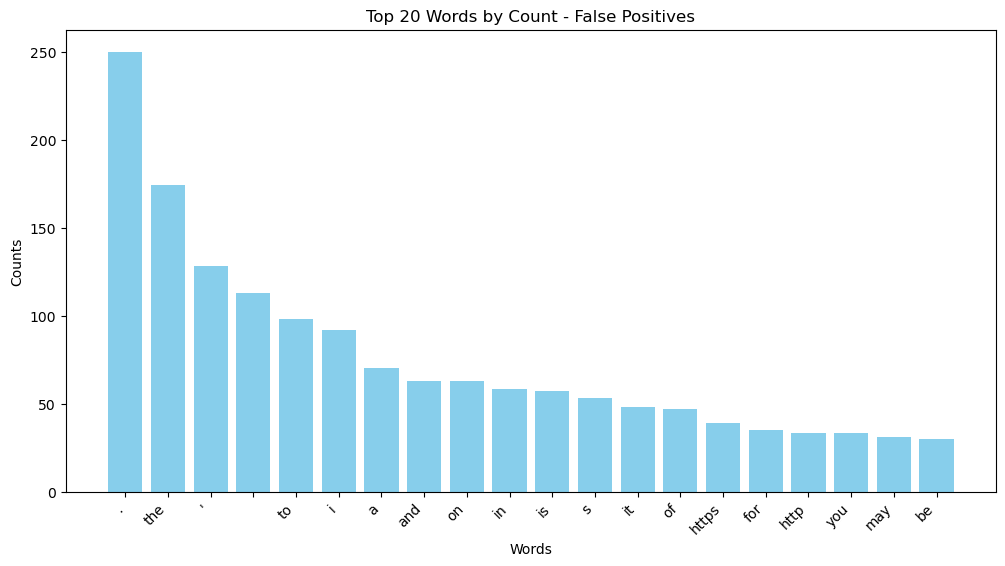

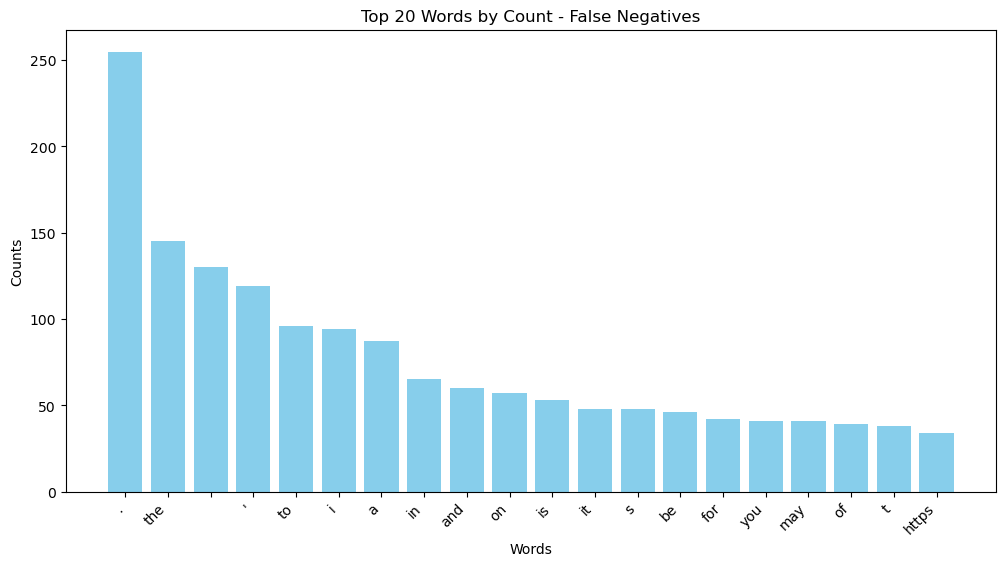

In [26]:
# Function to parse word counts and plot them
def plot_word_counts(data, title):
    # Initialize a Counter to accumulate word counts
    word_counts = Counter()

    # Parse each sentence and add counts to the Counter
    for text in data:
        for item in text.split(','):
            # Split item by ':' and check if the result has two parts
            if ':' in item:
                word, count = item.split(':', 1)  # Only split once
                try:
                    # Try converting the count to an integer
                    count = int(count)
                    word_counts[word] += count
                except ValueError:
                #   # If the count is not a valid integer, skip this item
                    print(end='')

    # Get the top 20 most common words
    top_20_words = dict(word_counts.most_common(20))

    # Plot the top 20 words and their counts
    plt.figure(figsize=(12, 6))
    plt.bar(top_20_words.keys(), top_20_words.values(), color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.title(f"Top 20 Words by Count - {title}")
    plt.show()

# Plot for false positives
plot_word_counts(false_positives, "False Positives")

# Plot for false negatives
plot_word_counts(false_negatives, "False Negatives")

Top 20 Words with highest TF-IDF scores across all data:
the: 17.973182019453354
to: 14.406398770399662
co: 14.028368098098696
and: 12.62841771608792
on: 12.129700715160954
in: 11.566454757164404
is: 11.294731569023496
it: 10.904271088360728
of: 9.690190844983073
may: 9.425428126325949
be: 9.421748764761531
https: 9.391994370013894
for: 9.225293635884514
you: 8.907415159206323
tomorrow: 7.886950826840226
but: 7.719929831087536
http: 7.595167863468406
that: 7.527967621606358
just: 7.268025123456166
my: 7.1533542537060635

Top words with highest TF-IDF scores in False Positives:
the: 9.87635801755392
co: 7.6063939393648585
to: 7.323897536013943
and: 6.351100959869045
on: 6.096771884049186
is: 5.743716890486678
in: 5.542282090294209
it: 5.407588149130518
of: 5.290424199030215
https: 5.1084507979436635
tomorrow: 4.494854155533984
http: 4.333623942990684
for: 4.166046965423679
like: 4.0444736008078275
you: 4.005770620633565
may: 3.993864290125421
just: 3.8972838155528824
day: 3.827454223077

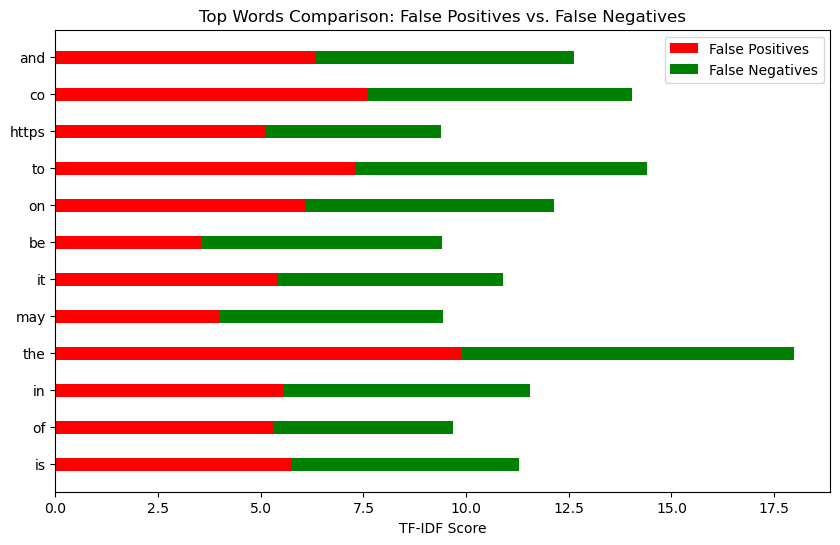

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer()

all_data = false_positives + false_negatives

tfidf_matrix = tfidf_vectorizer.fit_transform(all_data)

words = tfidf_vectorizer.get_feature_names_out()

scores = tfidf_matrix.sum(axis=0).A1 
word_tfidf = dict(zip(words, scores))

sorted_word_tfidf = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)

print("Top 20 Words with highest TF-IDF scores across all data:")
for word, score in sorted_word_tfidf[:20]:
    print(f"{word}: {score}")

false_positive_tfidf = tfidf_matrix[:len(false_positives), :].sum(axis=0).A1

true_positive_tfidf = tfidf_matrix[len(false_positives):, :].sum(axis=0).A1

# Create a dictionary to store words with their TF-IDF scores for each category
fp_word_tfidf = dict(zip(words, false_positive_tfidf))
tp_word_tfidf = dict(zip(words, true_positive_tfidf))

sorted_fp_tfidf = sorted(fp_word_tfidf.items(), key=lambda x: x[1], reverse=True)
sorted_tp_tfidf = sorted(tp_word_tfidf.items(), key=lambda x: x[1], reverse=True)

print("\nTop words with highest TF-IDF scores in False Positives:")
for word, score in sorted_fp_tfidf[:20]:
    print(f"{word}: {score}")

print("\nTop words with highest TF-IDF scores in False Negatives:")
for word, score in sorted_tp_tfidf[:20]:
    print(f"{word}: {score}")


top_words = list(set([word for word, _ in sorted_fp_tfidf[:10]] + [word for word, _ in sorted_tp_tfidf[:10]]))
fp_scores = [fp_word_tfidf.get(word, 0) for word in top_words]
tp_scores = [tp_word_tfidf.get(word, 0) for word in top_words]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
ax.barh(top_words, fp_scores, width, label='False Positives', color='red')
ax.barh(top_words, tp_scores, width, label='False Negatives', color='green', left=fp_scores)

ax.set_xlabel('TF-IDF Score')
ax.set_title('Top Words Comparison: False Positives vs. False Negatives')
ax.legend()

plt.show()


# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [76]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download resources if needed
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def pre_process(text):
    # Initialize stop words and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Separate punctuation from words
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
    text = re.sub(r"([.,;:'\"“!?\(\)])(\w)", r"\1 \2", text)
    
    # Tokenize by splitting on whitespace
    tokens = re.split(r"\s+", text)
    
    # Normalize: convert to lowercase, remove stopwords, and apply lemmatization
    tokens = [lemmatizer.lemmatize(t.lower()) for t in tokens if t.lower() not in stop_words]
   
    return tokens


text = "The quick brown fox jumps over the lazy dog!"
print(pre_process(text))




[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...


['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', '!']


In [30]:
import re

def pre_process(text):
    # Debugging print statement for original text
    print("Original:", text)
    
    # Separate punctuation from words at the end and beginning of strings
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)  # End of strings
    text = re.sub(r"([.,;:'\"“!?\(\)])(\w)", r"\1 \2", text)  # Beginning of strings
    
    # Debugging print statement for tokenized text
    print("Tokenizing:", text)
    
    # Word tokenization
    tokens = re.split(r"\s+", text)
    
    # Normalization - convert to lowercase
    tokens = [t.lower() for t in tokens]
   
    return tokens


In [ ]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)


tell me a different classifer i can use instead of this


In [32]:
# Initialize the global dictionary and index
global_feature_dict = {"<unk/>": 1}  # Reserve index 1 for unknown tokens
index_counter = 2 

def to_feature_vector(tokens):
    feature_vect = {}  # Initialize a local feature vector
    
    for token in tokens:
        ind = global_feature_dict.setdefault(token, len(global_feature_dict) + 1)
        
        # Increment the word count in the feature vector
        feature_vect[ind] = feature_vect.get(ind, 0) + 1
    
    return feature_vect